# Übung 6: Regularisierung

#### Bei der letzen Übung haben Sie gesehen, dass der Gradientenabstieg nur sehr schlecht konvergiert. Man kann zeigen, dass das Verfahren deutlich besser funktioniert wenn die Daten voher Skaliert oder Standardtisiert werden.

Laden Sie wieder die 'insurance.csv' Daten und filtern Sie nach männlichen Rauchern. Extrahieren Sie die Daten analog wie in der letzen Übung.

1. Skalieren sie die Daten mit dem `StandardScaler` und wenden Sie den Stochastischen Gradientenabstieg auf die Skalierten Daten an. Versuchen Sie verschiedene Learning Rates und Traingsdatengrößen. Was stellen Sie fest?
Hinweis: Vergessen Sie nicht die Daten zurückzutransformieren (siehe `StandardScaler().inverse_transform`).

2. Benutzen Sie `sklearn.preprocessing.PolynomialFeatures` und `sklearn.linear_model.LinearRegression` um ein Polynom zweiten Grades durch im Datensatz zu fitten. Hinweis: Benutzen Sie `StandardScaler` um die Konvergenz zu Verbesserung und nutzen Sie `sklearn.pipeline.Pipeline`. Setzen Sie `include_bias=False` und `degree=50` in PolynomialFeatures.

3. Regularisieren Sie das Modell zur Linearen Regression sowohl mit `Ridge` als auch mit `Lasso` aus `sklearn.linear_model`.

4. Implementieren Sie eine Funktion die Ihnen die Learning Curve plottet. Benutzen Sie die Funktion und plotten Sie die Learning Curve aus Aufgabe 2 und Aufgabe 3.


In [1]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler

In [2]:
insurance = pd.read_csv("data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
male_smokers = insurance[
    (insurance["sex"] == "male") & (insurance["smoker"] == "yes")
].sort_values(by=["bmi"])

male_smokers

,age,sex,bmi,children,smoker,region,expenses
250,18,male,17.3,2,yes,northeast,12829.46
99,38,male,19.3,0,yes,southwest,15820.70
266,40,male,19.8,1,yes,southeast,17179.52
98,56,male,20.0,0,yes,northeast,22412.65
1011,43,male,20.1,2,yes,southeast,18767.74
...,...,...,...,...,...,...,...
265,46,male,42.4,3,yes,southeast,46151.12
951,51,male,42.9,2,yes,southeast,47462.89
1156,19,male,44.9,0,yes,southeast,39722.75
292,25,male,45.5,2,yes,southeast,42112.24


In [4]:
X = male_smokers["bmi"].to_numpy().reshape(-1, 1)
y = male_smokers["expenses"].to_numpy().reshape(-1, 1)

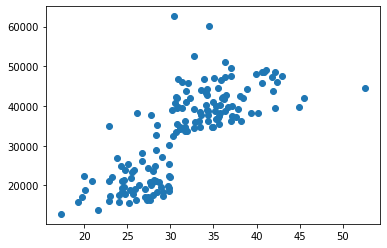

In [5]:
plt.scatter(X, y)

## Aufgabe 1

In [6]:
n_epochs = 10001
eta = 0.001
m = X.shape[0]
alpha = np.ones((2, 1))
X_one = np.c_[np.ones((X.shape[0], 1)), X]

# Ohne Skalierung ist keine Konvergenz zu erkennen
for epoch in range(n_epochs):
    if epoch % 1000 == 0:
        print(f"{epoch}, {alpha[0][0]}")
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_one[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ alpha - yi)
        alpha = alpha - eta * gradients

print("Divergiert")

0, 1.0
1000, -716672931.8869908
2000, 26529028196017.234
3000, 49853874.36999299
4000, 4044815533291.328
5000, -1.2883142158233797e+25
6000, -6.469699763758804e+28
7000, -4.532152566612948e+30
8000, 1.7867427464765336e+37
9000, 2.5471902740136405e+35
10000, 1.166931531819977e+47
Divergiert


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_one_scaled = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
y_scaled = scaler.transform(y)

n_epochs = 20
eta = 0.001

alpha = np.ones((2, 1))

# Mit Skalierung deutlich bessere Konvergenz
for epoch in range(n_epochs):
    print(f"{epoch}, {alpha[0][0]}, {alpha[1][0]}")
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_one_scaled[random_index : random_index + 1]
        yi = y_scaled[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ alpha - yi)
        alpha = alpha - eta * gradients

print("Konvergiert bereits nach ca. 10 Schritten, wegen deutlich größerer Schrittweite")

0, 1.0, 1.0
1, 1438.9124883757004, 234.5863906717991
2, 2616.494509009646, 697.1472359079357
3, 3461.8115649894035, 897.2309940107009
4, 4045.9780548621875, 1079.8556376041831
5, 4459.339557086131, 1173.7220897487823
6, 4760.769693657203, 1239.1075760852898
7, 4962.732592146857, 1292.7168254853468
8, 5166.880691374412, 1328.1761273620316
9, 5245.661533050139, 1364.044141589367
10, 5308.195017266063, 1391.3050970076386
11, 5368.982059548688, 1420.949161094006
12, 5443.058932981487, 1467.5412555320065
13, 5499.0397744650345, 1504.306265458538
14, 5467.389460325295, 1540.7460501120056
15, 5485.79219888798, 1494.1256066454064
16, 5500.61714699266, 1482.30715914378
17, 5550.826340011715, 1490.032658764405
18, 5579.2235867816535, 1460.9297285153946
19, 5626.385163296913, 1452.7379173719025
Konvergiert bereits nach ca. 10 Schritten, wegen deutlich größerer Schrittweite


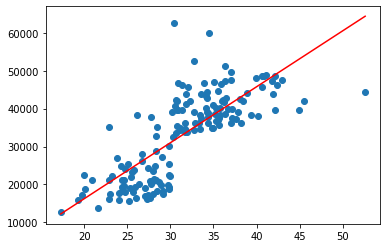

In [8]:
# Rücktransformation nicht vergessen
y_reg = scaler.inverse_transform(X_scaled * alpha[1] + alpha[0])

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()

## Aufgabe 2

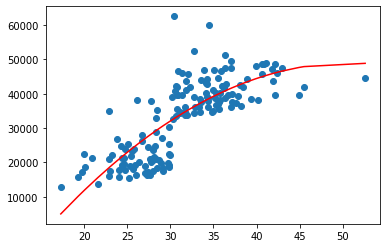

In [9]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

pipe = Pipeline(
    [
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ]
)

pipe.fit(X, y)
y_pred = pipe.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, "r")

(17.3, 52.6)

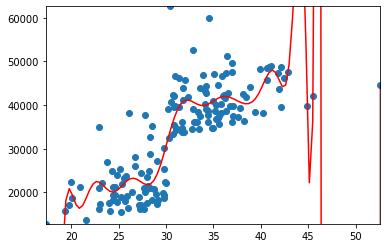

In [10]:
poly_features = PolynomialFeatures(degree=50, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

pipe = Pipeline(
    [
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ]
)

pipe.fit(X, y)

X_new = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
y_pred = pipe.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, y_pred, "r")

# Limit Plot Range
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(X), np.max(X))

(17.3, 52.6)

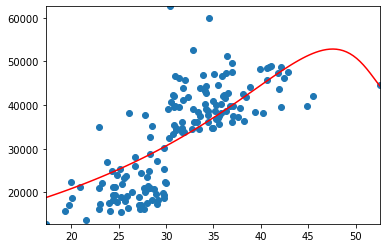

In [11]:
poly_features = PolynomialFeatures(degree=50, include_bias=False)
std_scaler = StandardScaler()
ridge_reg = Ridge(alpha=100)

pipe_ridge = Pipeline(
    [
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("ridge", ridge_reg),
    ]
)

pipe_ridge.fit(X, y)

X_new = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
y_pred = pipe_ridge.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, y_pred, "r")

# Limit Plot Range
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(X), np.max(X))

## Aufgabe 3

(17.3, 52.6)

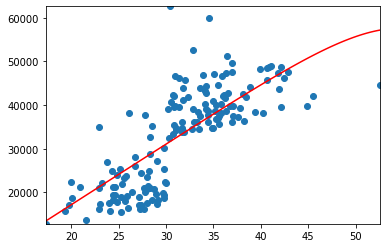

In [12]:
poly_features = PolynomialFeatures(degree=50, include_bias=False)
std_scaler = MinMaxScaler()
lasso_reg = Lasso(alpha=100, max_iter=10000)

pipe_lasso = Pipeline(
    [
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lasso", lasso_reg),
    ]
)

pipe_lasso.fit(X, y)

X_new = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
y_pred = pipe_lasso.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, y_pred, "r")

# Limit Plot Range
plt.ylim(np.min(y), np.max(y))
plt.xlim(np.min(X), np.max(X))

## Aufgabe 4

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=0
    )
    train_errors, val_errors = [], []
    for m in range(1, X_train.shape[0] + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r", label="Training")
    plt.plot(np.sqrt(val_errors), "b", label="Validierung")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

    # Besseres Plotting
    quant = 0.9
    min_y = np.max([np.min(np.sqrt(val_errors)), np.min(np.sqrt(train_errors))])
    max_y = np.max(
        [
            np.quantile(np.sqrt(val_errors), quant),
            np.quantile(np.sqrt(val_errors), quant),
        ]
    )
    plt.ylim(min_y, max_y)

    min_error = np.min(np.abs(np.array(train_errors) - np.array(val_errors)))
    print(f"Fehler am Ende des Trainings: {min_error}")

/usr/lib64/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Fehler am Ende des Trainings: 19842.796685785055


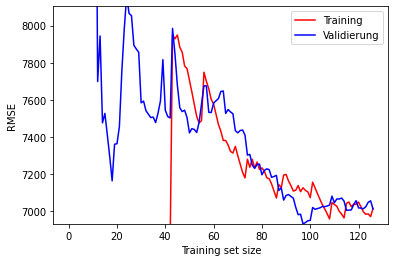

In [14]:
# Lasso Plot
plot_learning(pipe_lasso, X, y)

Fehler am Ende des Trainings: 178794.30846024305


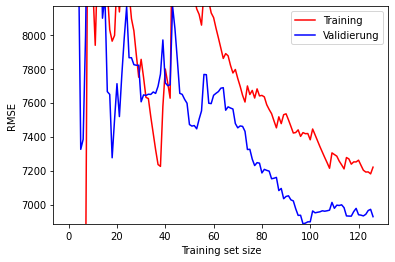

In [15]:
# Ridge Plot
plot_learning(ridge_reg, X, y)

Fehler am Ende des Trainings: 6990465.494481407


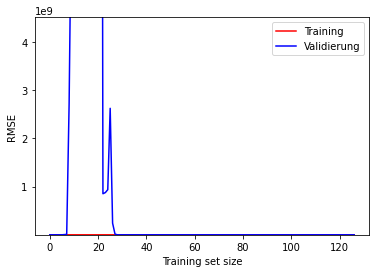

In [16]:
# Plain Plot - konvergiert nicht richtig - sehr hoher Fehler
plot_learning(pipe, X, y)